In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('survey.csv')

<p>This dataset contains the following data:
<ul>
<li><b>Age</b>
<li><b>Gender</b>
<li><b>Country</b>
<li><b>state</b>: If you live in the United States, which state or territory do you live in?
<li><b>self_employed</b>: Are you self-employed?
<li><b>family_history</b>: Do you have a family history of mental illness?
<li><b>treatment</b>: Have you sought treatment for a mental health condition?
<li><b>work_interfere</b>: If you have a mental health condition, do you feel that it interferes with your work?
<li><b>no_employees</b>: How many employees does your company or organization have?
<li><b>remote_work</b>: Do you work remotely (outside of an office) at least 50% of the time?
<li><b>tech_company</b>: Is your employer primarily a tech company/organization?
<li><b>benefits</b>: Does your employer provide mental health benefits?
<li><b>care_options</b>: Do you know the options for mental health care your employer provides?
<li><b>wellness_program</b>: Has your employer ever discussed mental health as part of an employee wellness program?
<li><b>seek_help</b>: Does your employer provide resources to learn more about mental health issues and how to seek help?
<li><b>anonymity</b>: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
<li><b>leave</b>: How easy is it for you to take medical leave for a mental health condition?
<li><b>mental_health_consequence</b>: Do you think that discussing a mental health issue with your employer would have negative consequences?
<li><b>phys_health_consequence</b>: Do you think that discussing a physical health issue with your employer would have negative consequences?
<li><b>coworkers</b>: Would you be willing to discuss a mental health issue with your coworkers?
<li><b>supervisor</b>: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
<li><b>mental_health_interview</b>: Would you discuss about mental health issue with your employer in a formal setting?
<li><b>phys_health_interview</b>: Would you discuss about physical health issue with your employer in a formal setting?
<li><b>mental_vs_physical</b>: Do you feel that your employer takes mental health as seriously as physical health?
<li><b>obs_consequence</b>: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
</ul></p>
<p>That is all we need to know about the columns' meaning.</p>

In [3]:
len(df)

2692

In [4]:
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


## Cleaning the data..

In [5]:
df.Age.unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72,          52,          17,
                63,          99,         323,           3,          66,
                59,          15,          74,          70], dtype=int64)

In [6]:
s = pd.Series(df['Age'])
s[(s<18) | (s>75)] = df['Age'].median()
df['Age'] = s

### 1.1 Creating age_range

In [7]:
df['age_range'] = pd.cut(df['Age'], [0,20,30,40,50,60,75], \
                         labels=["0-20", "21-30", "31-40", "41-50", "51-60", "61-75"], include_lowest=True)

In [8]:
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-40
1,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,41-50
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-40
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31-40
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-40


##  1.2 Enumerating the dataset

### 1.2.1 Creating functions to enumerate columns with three variables. 

In [9]:
def Three_func(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return 0.5

In [10]:
df['phys_health_consequence'] = df['phys_health_consequence'].apply(Three_func)
df['supervisor'] = df['supervisor'].apply(Three_func)
df['mental_health_consequence'] = df['mental_health_consequence'].apply(Three_func)
df['coworkers'] = df['coworkers'].apply(Three_func)
df['family_history'] = df['family_history'].apply(Three_func)
df['phys_health_interview'] = df['phys_health_interview'].apply(Three_func)

In [11]:
df['mental_health_interview'] = df['mental_health_interview'].apply(Three_func)

### 1.2.2 Creating functions to enumerate columns with two variables. 

In [12]:
def Two_func(x):
    if (x == 'Yes') |  (x == '1'):
        return 1
    elif (x == 'No') | (x == '0'):
        return 0

In [13]:
df['treatment'] = df['treatment'].apply(Two_func)
df['self_employed'] = df['self_employed'].apply(Two_func)
df['tech_company'] = df['tech_company'].apply(Two_func)

In [14]:
df['obs_consequence'] = df['obs_consequence'].apply(Two_func)
df['obs_consequence'] = df['obs_consequence'].fillna(value=0.5)

In [15]:
df['self_employed'] = df['self_employed'].fillna(value=0.5)
df['tech_company'] = df['tech_company'].fillna(value=0.5)

### 1.2.3 Creating functions to enumerate various columns

In [16]:
def Remote_func(x):
    if (x == 'Yes') | (x == 'Always'):
        return 0
    elif (x == 'No') | (x == 'Never'):
        return 1
    else:
        return 0.5

In [17]:
df['remote_work'] = df['remote_work'].apply(Remote_func)

In [18]:
def wellness_func(x):
    if (x == """Don't know""") | (x == """I don't know"""):
        return 0.5
    elif (x == 'No'):
        return 0
    else:
        return 1

In [19]:
df['wellness_program'] = df['wellness_program'].apply(wellness_func)

In [20]:
df['wellness_program'] = df['wellness_program'].fillna(value=0.5)

In [21]:
def clean_func(x):
    if (x == "Yes"):
        return 1
    elif (x == 'No') | (x == """Not eligible for coverage / N/A"""):
        return 0
    else:
        return 0.5

In [22]:
df['benefits'] = df['benefits'].apply(clean_func)
df['care_options'] = df['care_options'].apply(clean_func)
df['seek_help'] = df['seek_help'].apply(clean_func)
df['anonymity'] = df['anonymity'].apply(clean_func)

In [23]:
def leave_func(x):
    if (x == 'Very easy') | (x == 'Somewhat easy'):
        return 1
    elif (x == 'Somewhat difficult') | (x == 'Very difficult'):
        return 0
    else:
        return 0.5

In [24]:
df['leave'] = df['leave'].apply(leave_func)

In [25]:
def interfere_func(x):
    if x == 'Often':
        return 1
    elif x == 'Never':
        return 0
    else:
        return 0.5

In [26]:
df['work_interfere'] = df['work_interfere'].apply(interfere_func)

In [27]:
df.work_interfere.unique()

array([1. , 0.5, 0. ])

In [28]:
def vs_func(x):
    if (x == 'Yes') | (x == """Yes, they all did"""):
        return 1
    elif (x == 'No') | (x == 'None did'):
        return 0
    else:
        return 0.5

In [29]:
df['mental_vs_physical'] = df['mental_vs_physical'].apply(vs_func)

### 1.3 Dealing with Null Values

In [30]:
df['state'] = df['state'].fillna(value='Not mentioned')

In [31]:
df['no_employees'] = df['no_employees'].fillna(value='Not disclosed')

### 1.4 Adjusting no_employees column

In [32]:
df.no_employees.unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '5-18', '500-1000',
       'Not disclosed'], dtype=object)

In [33]:
df.no_employees.replace(to_replace='6-25',value='0-100',inplace=True)
df.no_employees.replace(to_replace='5-18',value='0-100',inplace=True)
df.no_employees.replace(to_replace='26-100',value='0-100',inplace=True)

In [34]:
df.no_employees.unique()

array(['0-100', 'More than 1000', '100-500', '500-1000', 'Not disclosed'],
      dtype=object)

## 2.0 About the dataset

###  2.1 Distribution of Age of people who took the survey:

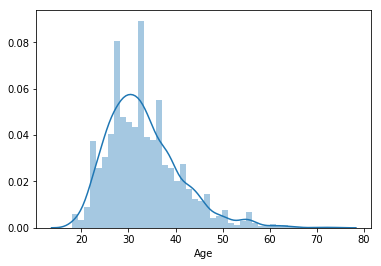

In [35]:
sns.distplot(df.Age)

### 2.2 Distribution of Gender of the people

In [279]:
df_gender = ((df.groupby('Gender')['Age'].count()/df.Gender.count())*100).reset_index()\
    .rename(columns={'Age':'Percentage'})
df_gender

,Gender,Percentage
0,Female,21.805349
1,Male,76.225854
2,Others,1.968796


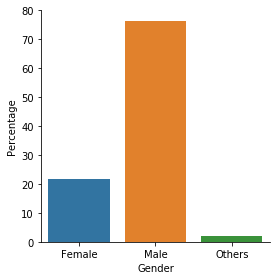

In [278]:
sns.factorplot(x='Gender',y='Percentage',data=df_gender,kind='bar')

### 2.3 Country-wise distribution of mental illness

In [227]:
df_treat_country= df[df.treatment==1].groupby(['Country'])['Age'].count().sort_values(ascending= False).nlargest(10)

In [228]:
df_country_total= (df.groupby(['Country'])['Age'].count().sort_values(ascending= False).nlargest(10))

In [229]:
df_country_percent = ((df_treat_country/df_country_total)*100)
df_percent= df_country_percent.nlargest(5).reset_index()\
.rename(columns={'Age': 'Country-wise distribution of mental illness'})
df_percent

,Country,Country-wise distribution of mental illness
0,Australia,66.071429
1,United States,60.339409
2,United Kingdom,51.506849
3,Netherlands,50.666667
4,Ireland,47.619048


### Graphical representation

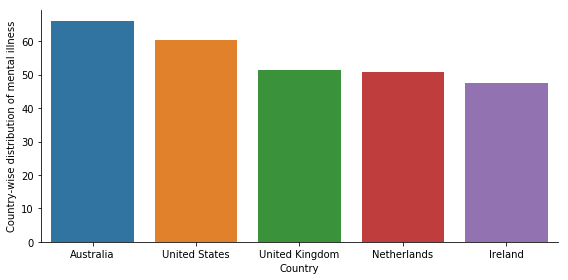

In [41]:
sns.factorplot(x='Country', y='Country-wise distribution of mental illness', data=df_percent, kind='bar', aspect=2)

### 2.4 State-wise distribution of mental illness in U.S.

In [280]:
df_treat_state= df[(df.treatment==1)&(df.Country == 'United States')].groupby(['state'])['Age'].count()\
    .sort_values(ascending= False).nlargest(10)

In [281]:
df_state_total= df[(df.Country == 'United States')].groupby(['state'])['Age'].count()\
    .sort_values(ascending= False).nlargest(10)

In [44]:
df_state_percent = ((df_treat_state/df_state_total)*100)
df_percentage= df_state_percent.nlargest(5).reset_index()\
.rename(columns={'Age': 'State-wise distribution of mental illness in U.S.'})
df_percentage

,state,State-wise distribution of mental illness in U.S.
0,IL,68.235294
1,CA,66.791045
2,TX,64.367816
3,OR,63.636364
4,PA,62.903226


### Graphical Representation

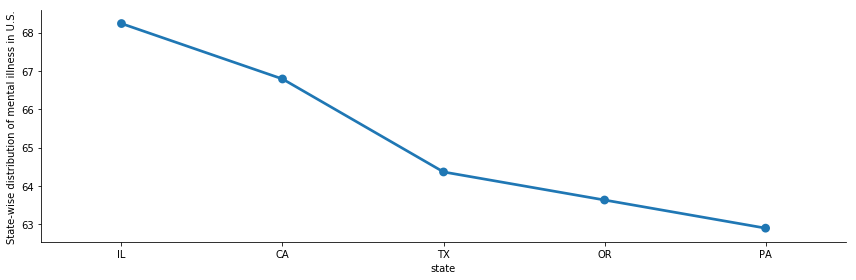

In [282]:
sns.factorplot(x='state', y='State-wise distribution of mental illness in U.S.', data=df_percentage, aspect=3)

### 2.5 Does having mental health issues affect the work of that respective person?

In [46]:
df_work_interfere_percent=((df[(df.work_interfere == 1)].groupby('Gender')['Age'].count())/df.groupby('Gender')['Age'].count()*100)\
    .reset_index().rename(columns={'Age':'Percentage of people for whom mental health issues interfere'})

In [47]:
df_work_interfere_percent

,Gender,Percentage of people for whom mental health issues interfere
0,Female,7.836457
1,Male,7.553606
2,Others,15.094340


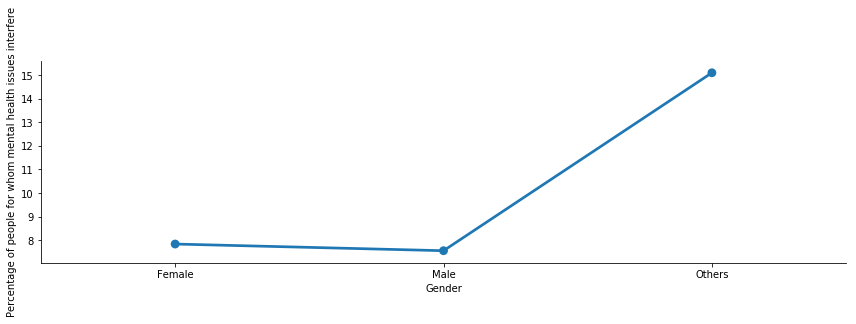

In [48]:
sns.factorplot(x='Gender',y='Percentage of people for whom mental health issues interfere', data=df_work_interfere_percent,aspect=3)

### 2.6 Linear Relation of Family History Vs. Treatment

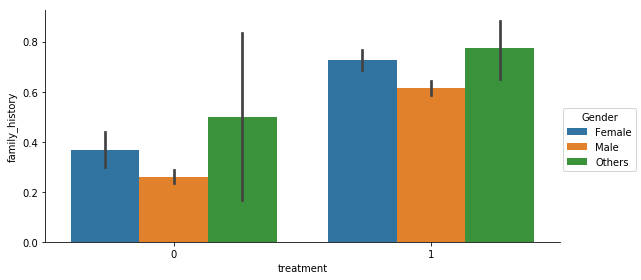

In [50]:
g = sns.factorplot(x="treatment", y="family_history", hue="Gender", data=df, kind="bar", aspect=2)

## Finding 1: Percentage of people willing to talk to others about mental health issues depending upon the <u>size of the company</u>

### Observation:

In [51]:
df_company_size=((df[(df.supervisor==1) | (df.coworkers == 1)].groupby('no_employees')['Age'].count())/\
                 df.groupby('no_employees')['Age'].count()*100)\
    .reset_index().rename(columns={'Age':'Percentage of people willing to share'})
df_company_size

,no_employees,Percentage of people willing to share
0,0-100,45.049885
1,100-500,43.396226
2,500-1000,44.285714
3,More than 1000,36.802974
4,Not disclosed,NaN


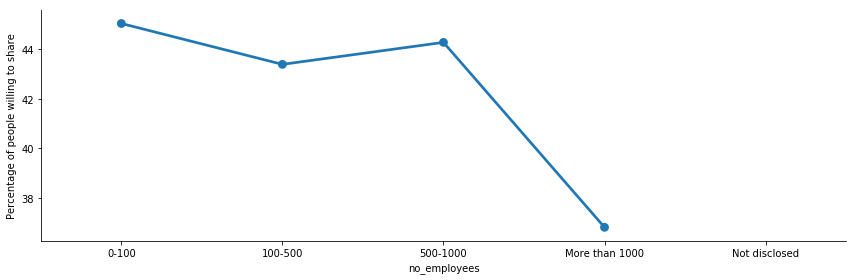

In [52]:
sns.factorplot(x='no_employees',y='Percentage of people willing to share', data=df_company_size, aspect=3)

## Interesting Insight:

### Percentage of organizations providing help to employees categorized by organization size

In [53]:
df_seek_help_percent= ((df[(df.seek_help == 1)].groupby('no_employees')['seek_help'].count())/\
                       df[(df.seek_help ==1)|(df.seek_help == 0)].groupby('no_employees')['seek_help'].count()*100)\
    .reset_index().rename(columns={'seek_help':'Percentage of organizations providing help to employees'})

In [54]:
df_seek_help_percent

,no_employees,Percentage of organizations providing help to employees
0,0-100,15.868263
1,100-500,34.545455
2,500-1000,54.761905
3,More than 1000,67.867036


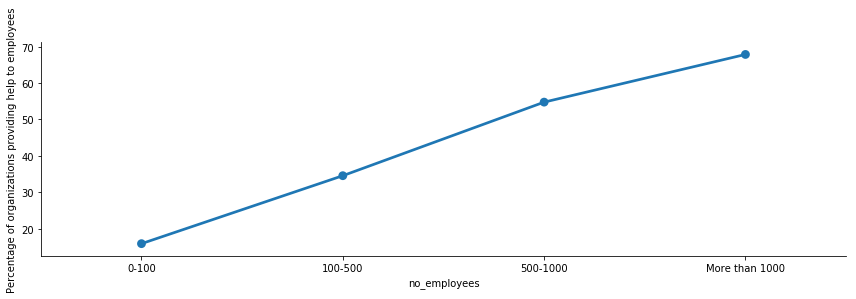

In [55]:
sns.factorplot(x='no_employees',y='Percentage of organizations providing help to employees', data=df_seek_help_percent,aspect=3)

In [56]:
df_benefits_percent = ((df[df.benefits == 1].groupby(['no_employees'])['benefits'].count()/\
    df[(df.benefits ==1)|(df.benefits == 0)].groupby(['no_employees'])['benefits'].count())*100).reset_index()\
    .rename(columns={'benefits':'Percentage of organizations providing benefits to employees'})
df_benefits_percent

,no_employees,Percentage of organizations providing benefits to employees
0,0-100,42.857143
1,100-500,73.571429
2,500-1000,80.645161
3,More than 1000,83.863081


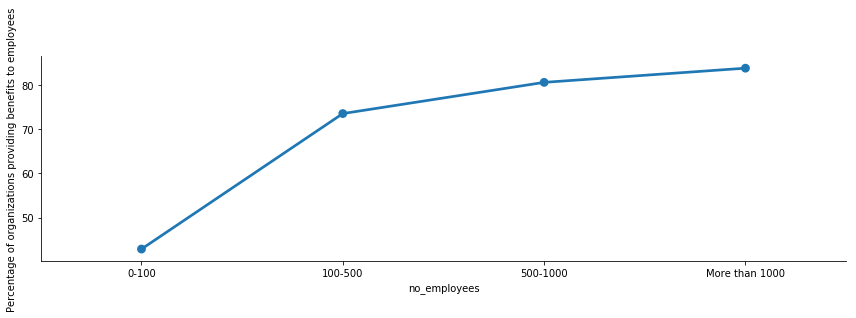

In [57]:
sns.factorplot(x='no_employees',y='Percentage of organizations providing benefits to employees', data=df_benefits_percent,aspect=3)

### Conclusion: People working in smaller companies are more willing to talk to other people vs. people working in a larger organizations; inspite of larger organizations spending more on mental health issues awareness and benefits.


In [217]:
df1 = df[(df.supervisor == 1)|(df.supervisor == 0)]

In [218]:
df2 = df1[['coworkers','supervisor','benefits','no_employees']]

In [219]:
df2 = pd.get_dummies(data=df2,columns=['no_employees'])

In [220]:
df2.head()

,coworkers,supervisor,benefits,no_employees_0-100,no_employees_100-500,no_employees_500-1000,no_employees_More than 1000
0,0.5,1.0,1.0,1,0,0,0
1,0.0,0.0,0.5,0,0,0,1
2,1.0,1.0,0.0,1,0,0,0
3,0.5,0.0,0.0,1,0,0,0
4,0.5,1.0,1.0,0,1,0,0


In [73]:
df2=df2.replace({'0-100':1,'100-500':2,'500-1000':3,'More than 1000':4,'Not disclosed':0})

In [221]:
X1 = df2.drop(['coworkers','supervisor'],axis=1)

In [222]:
Y1 = df2.supervisor

In [223]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [224]:
dt1 = tree.DecisionTreeClassifier(max_depth=1)

In [225]:
dt1.fit(X1,Y1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

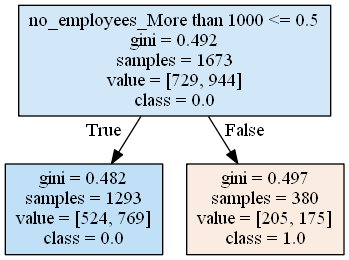

In [226]:
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

# This code will visualize a decision tree dt, 
# trained with the attributes in X and the class labels in Y
dt1_feature_names = list(X1.columns)
dt1_target_names = np.array(Y1.unique(),dtype=np.string_) 
result = np.array([s.decode('UTF-8') for s in dt1_target_names])
tree.export_graphviz(dt1, out_file='tree.dot', 
    feature_names=dt1_feature_names, class_names=result,filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

## Finding 2:

## Finding 2: Exploring the relation of <i>age</i> and people who have taken <i>treatment</i> 

In [86]:
df_age =((df[df.treatment==1].groupby('age_range')['Age'].count()/df.groupby('age_range')['Age'].count())*100).reset_index()\
    .rename(columns={'Age':'% of people who sought treatment'})
df_age

,age_range,% of people who sought treatment
0,0-20,40.625000
1,21-30,51.838235
2,31-40,55.488332
3,41-50,59.393939
4,51-60,68.571429
5,61-75,86.666667


### Graphical Representation

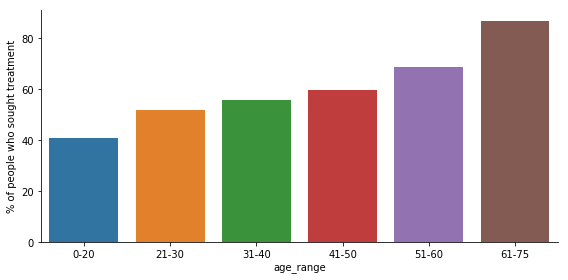

In [88]:
sns.factorplot(x='age_range',y='% of people who sought treatment', data=df_age, kind='bar',aspect=2)

### Observation: There is a clear linear relation between Age and the Percentage of people have saught treatment. As the age increases, the ratio of patients also increases.

## Interesting Insight: 

### Using Logistic Regression to find the weights of the factors that are important for predicting who have taken treatment for mental health issues

In [90]:
df_temp = df.copy()

In [92]:
df_temp = df_temp.drop(['Country','state','age_range'],axis=1)

In [93]:
df_temp=df_temp.replace({'0-100':1,'100-500':2,'500-1000':3,'More than 1000':4,'Not disclosed':0})

In [95]:
df_temp = df_temp.replace({'Male':1,'Others':0.5,'Female':0})

In [97]:
X_temp = df_temp.drop('treatment',axis=1)

In [98]:
Y_temp = df_temp.treatment

In [100]:
from sklearn import linear_model
model_temp = linear_model.LogisticRegression()

In [101]:
model_temp.fit(X_temp,Y_temp)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
(model_temp.coef_).round(2)

array([[ 0.02, -0.73, -0.02,  1.58,  1.55, -0.01, -0.02,  0.11,  0.26,
         0.93, -0.03,  0.  ,  0.42, -0.54,  0.33,  0.08,  0.94, -0.32,
        -0.56,  0.39, -0.21,  0.35]])

In [105]:
X_temp.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

### Observation: It can be seen that Class weight of Age is interestingly very low; which suggest that Age is not an important factor for predicting treatment


### Moreover, It can be seen that Age does not have high correlation compared to Treatment

In [121]:
df_temp['treatment'].corr(df['Age'])

0.07956922907261976

### Reason

In [127]:
df_age_distribution = df.groupby('age_range')['treatment'].count()
df_age_distribution = df_age_distribution.reset_index().rename(columns = {'treatment':'Count'})
df_age_distribution

,age_range,Count
0,0-20,32
1,21-30,1088
2,31-40,1157
3,41-50,330
4,51-60,70
5,61-75,15


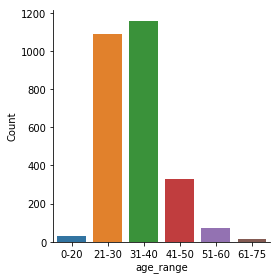

In [128]:
sns.factorplot(x='age_range',y='Count',data = df_age_distribution, kind = 'bar')

### Conclusion: Although graphical representation and statistics might suggest that Age has a linear relation with Treatment. After using Logistic regression to find out class weights and using correlation data, we found out that Treatment depends much more on factors like family history, work interference etc.

## Finding 3: Disconnect between employees' perception about mental & physical health VS their willingness to talk about it in when asked 

### 3.1 Creating new dataset 

In [244]:
df_new = df[['Gender','coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical']]

In [245]:
df_new.head()

,Gender,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical
0,Female,0.5,1.0,0.0,0.5,1.0
1,Male,0.0,0.0,0.0,0.0,0.5
2,Male,1.0,1.0,1.0,1.0,0.0
3,Male,0.5,0.0,0.5,0.5,0.0
4,Male,0.5,1.0,1.0,1.0,0.5


### 3.2 Enumerating the Gender column

In [246]:
df_new = df_new.replace({'Male':1,'Others':0.5,'Female':0})

In [247]:
df_condition = df_new[(df_new.mental_vs_physical==1) |(df_new.mental_vs_physical==0)]

### 3.3 Finding porportion of people who think their employer gives mental and physical health equal importance

In [267]:
df_final = df_new[['mental_health_interview', 'phys_health_interview']]

### 3.4 Using K-means to find further insight

In [268]:
from sklearn.cluster import KMeans

In [269]:
clust = KMeans(n_clusters=3, random_state=0)
clust

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [270]:
clust.fit(df_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [271]:
clust.labels_

array([2, 1, 0, ..., 0, 2, 2])

In [272]:
df_final['cluster']=clust.labels_

C:\Users\yugal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### 3.5 Percentage of people willing to discuss about mental and physical health when asked

In [273]:
df_p = (df_final.groupby('cluster').mean()*100).reset_index()
df_p

,cluster,mental_health_interview,phys_health_interview
0,0,34.280477,58.753437
1,1,4.422111,31.105528
2,2,9.983498,33.910891


### Conclusion: Although people believe that their respective employers give equal importance to both mental and physical wellness, they are still less willing to talk about the topic when asked about it in a formal setting.


In [171]:
df_neg_mental = df[df.mental_health_consequence == 1]

In [172]:
df_neg_mental_total = df[(df.mental_health_consequence == 1)|(df.mental_health_consequence==0)]

In [173]:
df_neg_phys = df[df.phys_health_consequence == 1]

In [174]:
df_neg_phys_total = df[(df.phys_health_consequence==1)|(df.phys_health_consequence==0)]

In [177]:
df_neg_mental_percent = ((df_neg_mental.groupby('Gender')[['mental_health_consequence']].count()/\
    df_neg_mental_total.groupby('Gender')[['mental_health_consequence']].count())*100).reset_index()
df_neg_mental_percent

,Gender,mental_health_consequence
0,Female,44.256757
1,Male,32.704403
2,Others,56.250000


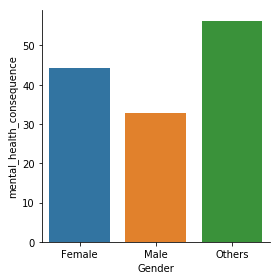

In [178]:
sns.factorplot(y='mental_health_consequence', x='Gender', data=df_neg_mental_percent,kind='bar')

In [181]:
df_neg_phys_percent = ((df_neg_phys.groupby('Gender')[['phys_health_consequence']].count()/\
    df_neg_phys_total.groupby('Gender')[['phys_health_consequence']].count())*100).reset_index()
df_neg_phys_percent

,Gender,phys_health_consequence
0,Female,8.776596
1,Male,4.341833
2,Others,16.216216


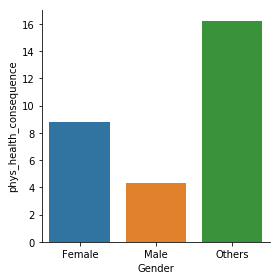

In [182]:
sns.factorplot(y='phys_health_consequence', x='Gender', data=df_neg_phys_percent,kind='bar')